In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab
import math as m
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [124]:
df=pd.read_csv('D:/beginner_datasets/New folder/car_prices.csv')
df.head(5)

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [125]:
df=df.drop(['car_id'],axis=1)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                3722 non-null   int64  
 1   fuel type            3721 non-null   object 
 2   gear type            3720 non-null   object 
 3   Make                 3722 non-null   object 
 4   Model                3722 non-null   object 
 5   Year of manufacture  3722 non-null   int64  
 6   Colour               3717 non-null   object 
 7   Condition            3722 non-null   object 
 8   Mileage              3663 non-null   float64
 9   Engine Size          3661 non-null   float64
 10  Selling Condition    3722 non-null   object 
 11  Bought Condition     3722 non-null   object 
 12  car                  1767 non-null   object 
 13  Trim                 879 non-null    object 
 14  Drivetrain           838 non-null    object 
 15  Seats                788 non-null    f

In [127]:
df.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,3.722000e+03,3722.000000,3.663000e+03,3.661000e+03,788.000000,826.000000,755.000000
mean,4.514644e+06,2008.145889,1.949841e+05,1.108062e+04,5.285533,5.157385,208.831788
std,4.297012e+06,4.205670,1.395755e+05,1.091127e+05,0.800853,1.202795,70.940925
min,5.500000e+05,1979.000000,1.000000e+00,1.800000e+02,2.000000,4.000000,83.000000
25%,2.310000e+06,2005.000000,1.173945e+05,2.000000e+03,5.000000,4.000000,158.000000
50%,3.360000e+06,2008.000000,1.762900e+05,2.500000e+03,5.000000,6.000000,203.000000
75%,5.036250e+06,2011.000000,2.453815e+05,3.500000e+03,5.000000,6.000000,268.000000
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06,8.000000,8.000000,585.000000


In [128]:
df.isna().sum()

price                     0
fuel type                 1
gear type                 2
Make                      0
Model                     0
Year of manufacture       0
Colour                    5
Condition                 0
Mileage                  59
Engine Size              61
Selling Condition         0
Bought Condition          0
car                    1955
Trim                   2843
Drivetrain             2884
Seats                  2934
Number of Cylinders    2896
Horse Power            2967
Registered city        1821
dtype: int64

### Data pre-processing

In [129]:
df_c=df.copy()

In [130]:
model=df_c['Model'].unique()

In [131]:
#segregating cartype based on model
s={}
for i in model:
    t=set()
    t.update(df_c['car'][df_c['Model']==i])
    t=list(t)
    s[i]=t

In [132]:
s

{'Corolla': [nan, 'Sedan', 'Hatchback', 'Saloon'],
 'MDX': [nan, 'Crossover', 'SUV'],
 'TL': [nan, 'Sedan'],
 'Range Rover': ['SUV'],
 'Edge': [nan, 'Crossover', 'SUV'],
 'ZDX': ['SUV'],
 'GX': [nan, 'SUV'],
 'GS': [nan, 'Sedan', 'SUV'],
 'Camry': [nan, 'Sedan'],
 'GLK-Class': [nan, 'SUV'],
 'M Class': [nan, 'SUV'],
 'GL-Class': [nan, 'SUV'],
 'Range Rover Vogue': ['SUV'],
 'Thesis': [nan],
 'HiAce': [nan, 'Bus'],
 'ES': [nan, 'Sedan'],
 'Highlander': [nan, 'SUV'],
 'RX 400h': [nan, 'SUV'],
 'Tacoma': [nan, 'Pickup', 'Truck'],
 'RAV4': [nan, 'Crossover', 'SUV'],
 'Venza': ['Crossover', nan, 'SUV'],
 'Duster': ['SUV'],
 'Hilux': [nan, 'Pickup', 'Truck', 'Pick-up Double Cabin'],
 'Viano': ['Van'],
 'Creta': ['SUV'],
 'H1': ['Bus'],
 'Santa Fe': [nan, 'SUV'],
 'Range Rover Evoque': [nan, 'SUV'],
 'IS': [nan, 'Sedan', 'Station Wagon'],
 'RC': ['Coupe'],
 'Sonata': [nan, 'Sedan'],
 'C300': [nan, 'Sedan'],
 'Sequoia': [nan, 'SUV'],
 'Land Cruiser Prado': ['SUV'],
 'C-Class': [nan, 'Sedan', '

In [133]:
#Finding Mode for each car type based on model and storing them in dictonary
s1={}
for k,v in s.items():
    while np.nan in v: 
        v.remove(np.nan)
    if(len(v)>0):
        for i in v:
            s1[k]=df['car'][(df.Model==k)].value_counts().idxmax()

In [135]:
s1

{'Corolla': 'Sedan',
 'MDX': 'SUV',
 'TL': 'Sedan',
 'Range Rover': 'SUV',
 'Edge': 'SUV',
 'ZDX': 'SUV',
 'GX': 'SUV',
 'GS': 'Sedan',
 'Camry': 'Sedan',
 'GLK-Class': 'SUV',
 'M Class': 'SUV',
 'GL-Class': 'SUV',
 'Range Rover Vogue': 'SUV',
 'HiAce': 'Bus',
 'ES': 'Sedan',
 'Highlander': 'SUV',
 'RX 400h': 'SUV',
 'Tacoma': 'Truck',
 'RAV4': 'SUV',
 'Venza': 'SUV',
 'Duster': 'SUV',
 'Hilux': 'Truck',
 'Viano': 'Van',
 'Creta': 'SUV',
 'H1': 'Bus',
 'Santa Fe': 'SUV',
 'Range Rover Evoque': 'SUV',
 'IS': 'Sedan',
 'RC': 'Coupe',
 'Sonata': 'Sedan',
 'C300': 'Sedan',
 'Sequoia': 'SUV',
 'Land Cruiser Prado': 'SUV',
 'C-Class': 'Sedan',
 'Sienna': 'Minivan',
 'Tundra': 'Truck',
 'Avalon': 'Sedan',
 'Vue': 'SUV',
 'GLA 250': 'Hatchback',
 'Explorer': 'SUV',
 'Matrix': 'Hatchback',
 'Land Cruiser': 'SUV',
 'RX 350': 'SUV',
 'GLE-Class': 'SUV',
 'CLS': 'Sedan',
 'Expedition': 'SUV',
 'R-Class': 'SUV',
 'Discovery': 'SUV',
 'Journey': 'SUV',
 'Fortuner': 'SUV',
 'QX60': 'SUV',
 'Vibe': 'H

In [136]:
df_c.car.isna().sum()

1955

In [137]:
#replacing null in cartype with the above dictonary

df_c.car = df_c.car.fillna(df_c.Model.map(s1))

In [138]:
df_c.car.isna().sum()

207

In [139]:
# droping all cols with high number of null values

df_c=df_c.drop(df_c.columns[df_c.isna().sum()>300],axis=1)

In [140]:
df_c.tail(5)

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car
3717,1924000,Petrol,Automatic,Toyota,RAV4,2003,Red,Nigerian Used,282769.0,2000.0,Registered,Imported,SUV
3718,1890000,Petrol,Automatic,Mercedes-Benz,M Class,2002,Silver,Nigerian Used,182544.0,3200.0,Registered,Registered,SUV
3719,1155000,Petrol,Automatic,Toyota,Camry,2000,Black,Nigerian Used,234354.0,2200.0,Registered,Registered,Sedan
3720,1260000,Petrol,Automatic,Toyota,RAV4,2001,Black,Nigerian Used,345926.0,2000.0,Registered,Registered,SUV
3721,1872000,Petrol,Automatic,Honda,Civic,2007,Black,Nigerian Used,90330.0,1800.0,Registered,Registered,Sedan


In [141]:
df1=df_c.copy()

In [142]:
df1.dropna(inplace=True)

In [143]:
df1.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

In [144]:
cat_col = df1.select_dtypes(include=['object']).columns
num_col = df1.select_dtypes(exclude=['object']).columns

In [145]:
df1[df1['Make']=='Rover']

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car
2791,15750000,Petrol,Automatic,Rover,Land,2013,White,Foreign Used,154023.0,2500.0,Imported,Imported,SUV
3162,40950000,Petrol,Automatic,Rover,Land,2018,Brown,Foreign Used,40457.0,3800.0,Imported,Imported,SUV


In [146]:
ind=df1[df1['Make']=='Rover'].index.to_list()

In [147]:
df1.drop(ind,axis=0,inplace=True)

In [53]:
df1['Make']=df1['Make'].replace(['Other'],'Honda')
df1['Make']=df1['Make'].replace(['Swipe Key Cards'],'Mercedes-Benz')
df1['Make']=df1['Make'].replace(['Self Contained'],'Volkswagen')

### EDA

In [54]:
dfmean = pd.DataFrame(df1.groupby(['car'])['price'].mean().sort_values(ascending = False))
dfmean1 = pd.DataFrame(df1.groupby(['Make'])['price'].mean().sort_values(ascending = False))

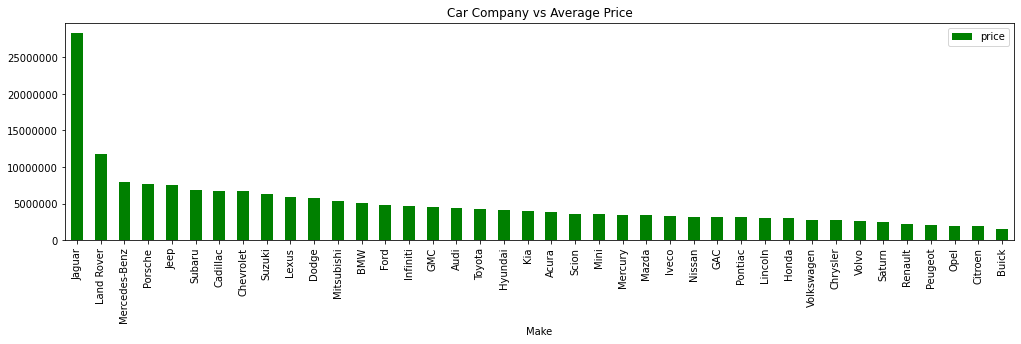

In [148]:
dfmean1.plot.bar(color='g',figsize=(17,4))
plt.ticklabel_format(axis="y", style='plain')
plt.title('Car Company vs Average Price')
plt.show()

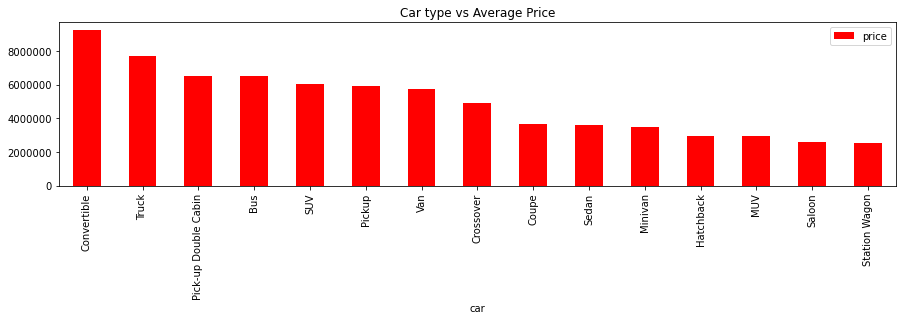

In [149]:
dfmean.plot.bar(color='r',figsize=(15,3))
plt.ticklabel_format(axis="y", style='plain')
plt.title('Car type vs Average Price')
plt.show()

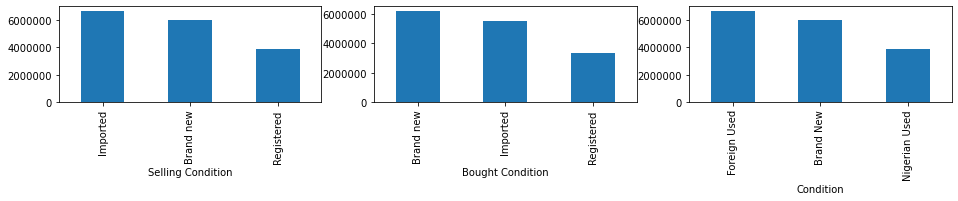

In [150]:
dfmean2 = df1.groupby(['Selling Condition'])['price'].mean().sort_values(ascending = False)
dfmean3 =df1.groupby(['Bought Condition'])['price'].mean().sort_values(ascending = False)
dfmean4 =df1.groupby(['Condition'])['price'].mean().sort_values(ascending = False)


plt.subplot(3,3,1)
ax=dfmean2.plot.bar(figsize=(16,6))
plt.ticklabel_format(axis="y", style='plain')

plt.subplot(3,3,2)
ax=dfmean3.plot.bar(figsize=(16,6))
plt.ticklabel_format(axis="y", style='plain')

plt.subplot(3,3,3)
ax=dfmean4.plot.bar(figsize=(16,6))
plt.ticklabel_format(axis="y", style='plain')



<AxesSubplot:xlabel='Make'>

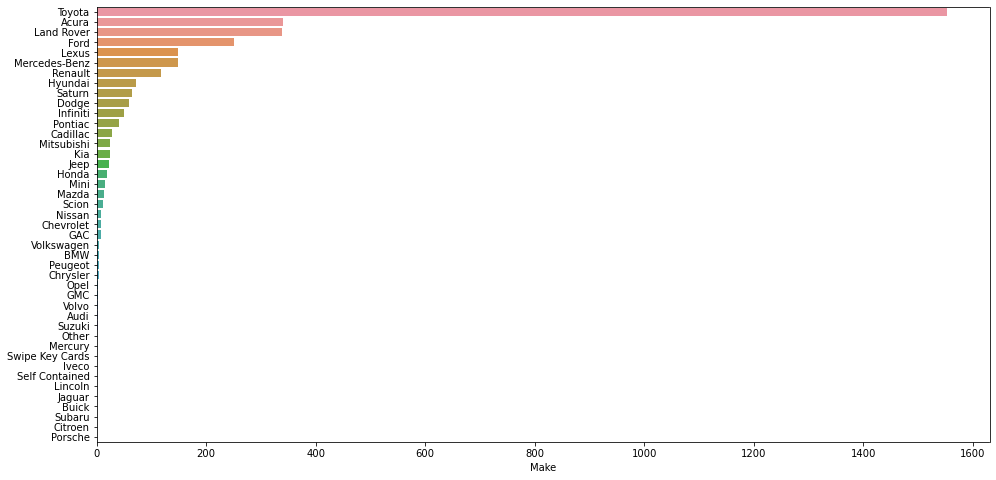

In [151]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=df1.Make.value_counts(),y=df1.Make.unique(),ax=ax)

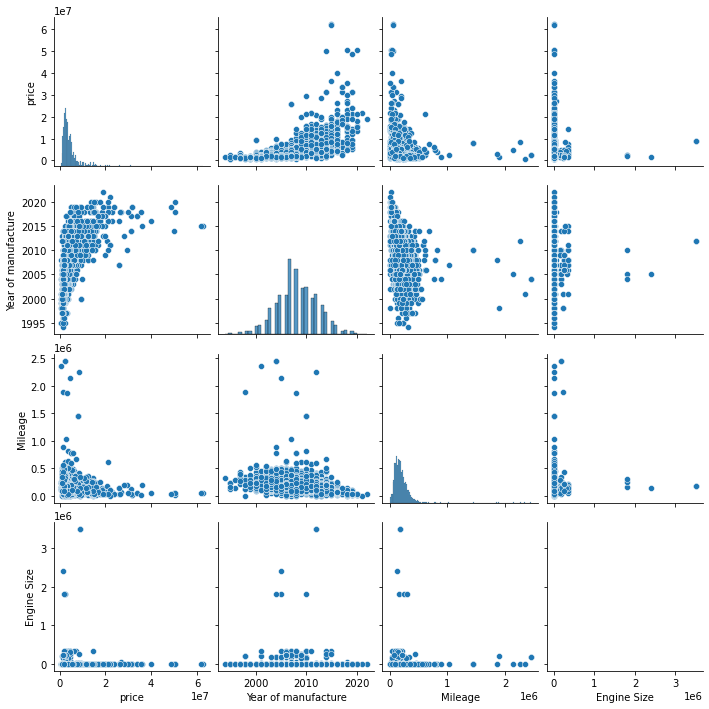

In [111]:
sns.pairplot(df1)
plt.ticklabel_format(axis="y", style='plain')

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 3721
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                3407 non-null   int64  
 1   fuel type            3407 non-null   object 
 2   gear type            3407 non-null   object 
 3   Make                 3407 non-null   object 
 4   Model                3407 non-null   object 
 5   Year of manufacture  3407 non-null   int64  
 6   Colour               3407 non-null   object 
 7   Condition            3407 non-null   object 
 8   Mileage              3407 non-null   float64
 9   Engine Size          3407 non-null   float64
 10  Selling Condition    3407 non-null   object 
 11  Bought Condition     3407 non-null   object 
 12  car                  3407 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 372.6+ KB


In [155]:
# converting year to object as it is a categorical data

df1['Year of manufacture']=df1['Year of manufacture'].astype('object')

### Scaling and encoding data

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['Mileage']=scaler.fit_transform(np.c_[df1['Mileage']])
df1['Engine Size']=scaler.fit_transform(np.c_[df1['Engine Size']])

In [159]:
df1.head()

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car
0,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,0.398127,-0.085856,Registered,Registered,Sedan
1,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,0.206725,-0.069027,Imported,Imported,SUV
2,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,-0.591905,-0.070798,Imported,Imported,Sedan
3,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,-0.864464,-0.066369,Registered,Imported,SUV
4,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,-0.727409,-0.070798,Registered,Registered,SUV


In [160]:
dummy=pd.get_dummies(df1)

In [161]:
x=dummy.drop(['price'], axis=1)
y=dummy['price']

In [229]:
# Train test split

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25,random_state=42)

In [230]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [297]:
# After several iteration taking 100 features using SelectKBest for Training the model

j=100
fs = SelectKBest(score_func=f_regression, k=j)  

In [298]:
fs.fit(X_train, y_train)

SelectKBest(k=100, score_func=<function f_regression at 0x000001AF1C8C3940>)

In [299]:
'''features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(X_train.columns)
feature_score = pd.concat([features, features_score, features_pvalue], axis=1)
# Assign the column name
feature_score.columns = ['Input' ,'Score','pval']
#print(feature_score.nlargest(47, columns="Score"))'''

'features_score = pd.DataFrame(fs.scores_)\nfeatures_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))\nfeatures = pd.DataFrame(X_train.columns)\nfeature_score = pd.concat([features, features_score, features_pvalue], axis=1)\n# Assign the column name\nfeature_score.columns = [\'Input\' ,\'Score\',\'pval\']\n#print(feature_score.nlargest(47, columns="Score"))'

In [300]:
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [301]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_fs, y_train)

LinearRegression()

In [302]:
y_pred=model.predict(X_test_fs)

In [303]:
score1 = model.score(X_train_fs, y_train)
score2 = model.score(X_test_fs, y_test)

print("Training set accuracy: ", '%.3f'%(score1*100))
print("Test set accuracy: ", '%.3f'%(score2*100))

Training set accuracy:  77.109
Test set accuracy:  61.636


In [304]:
# calulating MAPE score. It is 0.28 which is pretty good!

metrics.mean_absolute_percentage_error(y_test,y_pred)

0.28545721980662286

### Trying a neural network model as experiment

In [321]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [306]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train_fs.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 112,001
Trainable params: 112,001
Non-trainable params: 0
_________________________________________________________________


In [307]:
history=NN_model.fit(X_train_fs, y_train, epochs=300, batch_size=32, validation_split = 0.2)


Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 4563701.0000 - mean_absolute_error: 4563701.0000 - val_loss: 4343703.0000 - val_mean_absolute_error: 4343703.0000
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 4542631.5000 - mean_absolute_error: 4542631.5000 - val_loss: 4276042.0000 - val_mean_absolute_error: 4276042.0000
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 4323568.5000 - mean_absolute_error: 4323568.5000 - val_loss: 3805396.2500 - val_mean_absolute_error: 3805396.2500
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 3404790.7500 - mean_absolute_error: 3404790.7500 - val_loss: 2431726.5000 - val_mean_absolute_error: 2431726.5000
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 2292453.2500 - mean_absolute_error: 2292453.2500 - val_loss: 2061998.1250 - val_mean_absolute_error: 2061998.1250
Epoch 6/300
64/64 [==============================] - 0s 3ms/step 

64/64 [==============================] - 0s 2ms/step - loss: 1158578.7500 - mean_absolute_error: 1158578.7500 - val_loss: 1130708.6250 - val_mean_absolute_error: 1130708.6250
Epoch 45/300
64/64 [==============================] - 0s 2ms/step - loss: 1152958.0000 - mean_absolute_error: 1152958.0000 - val_loss: 1126072.1250 - val_mean_absolute_error: 1126072.1250
Epoch 46/300
64/64 [==============================] - 0s 2ms/step - loss: 1145694.2500 - mean_absolute_error: 1145694.2500 - val_loss: 1128499.3750 - val_mean_absolute_error: 1128499.3750
Epoch 47/300
64/64 [==============================] - 0s 2ms/step - loss: 1141028.5000 - mean_absolute_error: 1141028.5000 - val_loss: 1118762.0000 - val_mean_absolute_error: 1118762.0000
Epoch 48/300
64/64 [==============================] - 0s 2ms/step - loss: 1135488.3750 - mean_absolute_error: 1135488.3750 - val_loss: 1114440.8750 - val_mean_absolute_error: 1114440.8750
Epoch 49/300
64/64 [==============================] - 0s 2ms/step - loss:

Epoch 88/300
64/64 [==============================] - 0s 3ms/step - loss: 970789.1875 - mean_absolute_error: 970789.1875 - val_loss: 978990.3750 - val_mean_absolute_error: 978990.3750
Epoch 89/300
64/64 [==============================] - 0s 2ms/step - loss: 967009.8750 - mean_absolute_error: 967009.8750 - val_loss: 980441.7500 - val_mean_absolute_error: 980441.7500
Epoch 90/300
64/64 [==============================] - 0s 2ms/step - loss: 965241.0625 - mean_absolute_error: 965241.0625 - val_loss: 977590.1875 - val_mean_absolute_error: 977590.1875
Epoch 91/300
64/64 [==============================] - 0s 2ms/step - loss: 963031.0625 - mean_absolute_error: 963031.0625 - val_loss: 973928.4375 - val_mean_absolute_error: 973928.4375
Epoch 92/300
64/64 [==============================] - 0s 2ms/step - loss: 961564.7500 - mean_absolute_error: 961564.7500 - val_loss: 968648.4375 - val_mean_absolute_error: 968648.4375
Epoch 93/300
64/64 [==============================] - 0s 2ms/step - loss: 958059

64/64 [==============================] - 0s 2ms/step - loss: 877075.4375 - mean_absolute_error: 877075.4375 - val_loss: 895004.6250 - val_mean_absolute_error: 895004.6250
Epoch 133/300
64/64 [==============================] - 0s 2ms/step - loss: 875190.6875 - mean_absolute_error: 875190.6875 - val_loss: 892485.1875 - val_mean_absolute_error: 892485.1875
Epoch 134/300
64/64 [==============================] - 0s 2ms/step - loss: 873663.3750 - mean_absolute_error: 873663.3750 - val_loss: 892682.6250 - val_mean_absolute_error: 892682.6250
Epoch 135/300
64/64 [==============================] - 0s 2ms/step - loss: 872206.1875 - mean_absolute_error: 872206.1875 - val_loss: 889702.5000 - val_mean_absolute_error: 889702.5000
Epoch 136/300
64/64 [==============================] - 0s 2ms/step - loss: 869506.7500 - mean_absolute_error: 869506.7500 - val_loss: 891352.9375 - val_mean_absolute_error: 891352.9375
Epoch 137/300
64/64 [==============================] - 0s 2ms/step - loss: 868914.6250 - 

64/64 [==============================] - 0s 2ms/step - loss: 817379.6875 - mean_absolute_error: 817379.6875 - val_loss: 855476.6875 - val_mean_absolute_error: 855476.6875
Epoch 177/300
64/64 [==============================] - 0s 1ms/step - loss: 815774.8125 - mean_absolute_error: 815774.8125 - val_loss: 857663.8750 - val_mean_absolute_error: 857663.8750
Epoch 178/300
64/64 [==============================] - 0s 1ms/step - loss: 814548.3750 - mean_absolute_error: 814548.3750 - val_loss: 854211.6875 - val_mean_absolute_error: 854211.6875
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 815904.6875 - mean_absolute_error: 815904.6875 - val_loss: 855677.9375 - val_mean_absolute_error: 855677.9375
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 812669.0000 - mean_absolute_error: 812669.0000 - val_loss: 851727.0625 - val_mean_absolute_error: 851727.0625
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 812175.1875 - 

64/64 [==============================] - 0s 2ms/step - loss: 772357.0625 - mean_absolute_error: 772357.0625 - val_loss: 839956.2500 - val_mean_absolute_error: 839956.2500
Epoch 221/300
64/64 [==============================] - 0s 2ms/step - loss: 771840.2500 - mean_absolute_error: 771840.2500 - val_loss: 841420.1875 - val_mean_absolute_error: 841420.1875
Epoch 222/300
64/64 [==============================] - 0s 1ms/step - loss: 769459.3125 - mean_absolute_error: 769459.3125 - val_loss: 841573.4375 - val_mean_absolute_error: 841573.4375
Epoch 223/300
64/64 [==============================] - 0s 2ms/step - loss: 769139.2500 - mean_absolute_error: 769139.2500 - val_loss: 842380.3750 - val_mean_absolute_error: 842380.3750
Epoch 224/300
64/64 [==============================] - 0s 2ms/step - loss: 767699.1250 - mean_absolute_error: 767699.1250 - val_loss: 841238.1875 - val_mean_absolute_error: 841238.1875
Epoch 225/300
64/64 [==============================] - 0s 2ms/step - loss: 767252.5000 - 

64/64 [==============================] - 0s 4ms/step - loss: 736022.9375 - mean_absolute_error: 736022.9375 - val_loss: 835781.0000 - val_mean_absolute_error: 835781.0000
Epoch 265/300
64/64 [==============================] - 0s 2ms/step - loss: 735549.0000 - mean_absolute_error: 735549.0000 - val_loss: 832323.1250 - val_mean_absolute_error: 832323.1250
Epoch 266/300
64/64 [==============================] - 0s 3ms/step - loss: 733569.9375 - mean_absolute_error: 733569.9375 - val_loss: 832925.3750 - val_mean_absolute_error: 832925.3750
Epoch 267/300
64/64 [==============================] - 0s 2ms/step - loss: 733335.2500 - mean_absolute_error: 733335.2500 - val_loss: 835826.1250 - val_mean_absolute_error: 835826.1250
Epoch 268/300
64/64 [==============================] - 0s 2ms/step - loss: 732207.8125 - mean_absolute_error: 732207.8125 - val_loss: 833413.6250 - val_mean_absolute_error: 833413.6250
Epoch 269/300
64/64 [==============================] - 0s 1ms/step - loss: 731403.9375 - 

In [308]:
y_pred_n=NN_model.predict(X_test_fs)

27/27 [==============================] - 0s 977us/step


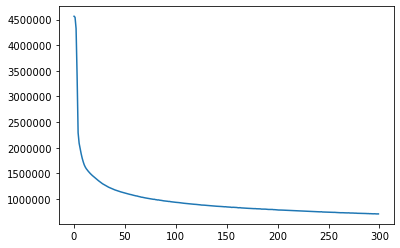

In [322]:
plt.plot(history.history['mean_absolute_error'])
plt.ticklabel_format(axis="y", style='plain')
plt.show()

In [324]:
# The MAPE score is 0.19 it is better to go with linear regression as NN models requires more computation resource.

metrics.mean_absolute_percentage_error(y_test,y_pred_n)

0.19740566339099064